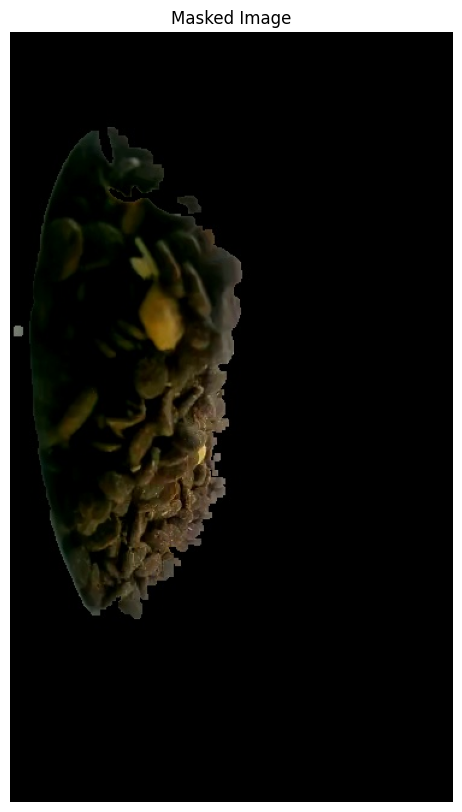

ValueError: cannot reshape array of size 49868 into shape (640,368)

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Load your image (replace 'your_image.jpg' with the path to your image)
image = cv2.imread('temp.jpg')


# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Define your mask (for example, a simple threshold mask)
# Here, we assume you have a mask already defined
# If you don't, you can create one like this:
# mask = cv2.inRange(image_rgb, lower_bound, upper_bound)
mask = cv2.inRange(image_rgb, (50, 50, 50), (255, 255, 255))  # Example mask

# Apply the mask to the image
masked_image = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)
masked_image = image_rgb.copy()  # Uncomment this line to see the original image without the mask
# Display the masked image
plt.figure(figsize=(10, 10))
plt.imshow(masked_image)
plt.axis('off')
plt.title('Masked Image')
plt.show()

# Reshape the image to a 2D array of pixels
Z = masked_image.reshape((-1, 3))

# Ignore zero pixel values
Z = Z[np.any(Z != 0, axis=1)]

# Define the number of components for the GMM
n_components = 3

# Create a GMM model
gmm = GaussianMixture(n_components=n_components, random_state=42)

# Fit the model to the data
gmm.fit(Z)

# Predict the labels for each pixel
labels = gmm.predict(Z)

# Convert the labels back to the image shape
labels = labels.reshape(masked_image.shape[:2])

# Create a new image with the clustered pixel values
segmented_image = np.zeros_like(masked_image)

for i in range(n_components):
    segmented_image[labels == i] = gmm.means_[i]

# Display the segmented image
plt.figure(figsize=(10, 10))
plt.imshow(segmented_image)
plt.axis('off')
plt.title('Segmented Image using GMM')
plt.show()

# Print GMM means
print('GMM Means:', gmm.means_)


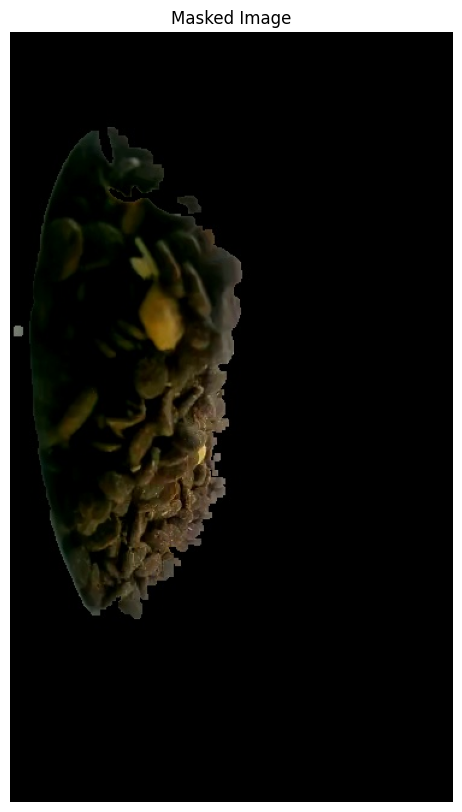

error: OpenCV(4.5.3) :-1: error: (-5:Bad argument) in function 'train'
> Overload resolution failed:
>  - Expected Ptr<cv::ml::TrainData> for argument 'trainData'
>  - ml_StatModel.train() missing required argument 'responses' (pos 3)
>  - ml_StatModel.train() missing required argument 'responses' (pos 3)


: 

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Display the masked image
plt.figure(figsize=(10, 10))
plt.imshow(masked_image)
plt.axis('off')
plt.title('Masked Image')
plt.show()

# Reshape the image to a 2D array of pixels
Z = masked_image.reshape((-1, 3))

# Ignore zero pixel values
Z = Z[np.any(Z != 0, axis=1)]

# Convert to float32
Z = np.float32(Z)

# Define the number of components for the GMM
n_components = 3

# Create a GMM model
gmm = cv2.ml.NormalBayesClassifier_create()
gmm = cv2.ml.EM_create()
gmm.setClustersNumber(n_components)
gmm.setCovarianceMatrixType(cv2.ml.EM_COV_MAT_DIAGONAL)
gmm.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER | cv2.TERM_CRITERIA_EPS, 100, 0.1))

# Fit the model to the data
gmm.train(Z, cv2.ml.ROW_SAMPLE)

# Predict the labels for each pixel
_, labels = gmm.predict(Z)

# Convert the labels back to the image shape
labels = labels.reshape(masked_image.shape[:2])

# Create a new image with the clustered pixel values
segmented_image = np.zeros_like(masked_image)

# Get the means of the clusters
means = gmm.getMeans().reshape((n_components, 3))

for i in range(n_components):
    segmented_image[labels == i] = means[i]

# Display the segmented image
plt.figure(figsize=(10, 10))
plt.imshow(segmented_image)
plt.axis('off')
plt.title('Segmented Image using GMM')
plt.show()

# Print GMM means
print('GMM Means:', means)
